C:\Users\pmayn\AppData\Local\Temp\ipykernel_5056\1692900436.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


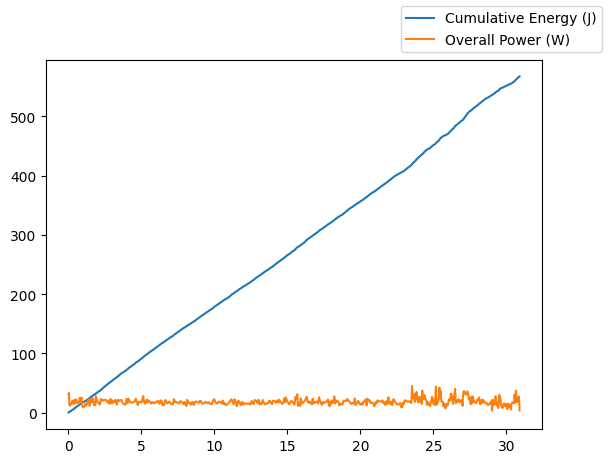

In [43]:
import polars as pl
import matplotlib.pyplot as plt
import csv
data = "power-logs\PowerLog-2023-03-03 11-47-00.408197"

df = pl.read_csv(data)

df.with_columns([
    pl.col("System Time").str.strptime(pl.Time, fmt="%H:%M:%S:%f",strict=False).cast(pl.Time, strict=False),    
])


fig, ax = plt.subplots()

timeline = df.select(pl.col("Elapsed Time (sec)"))
ax.plot(timeline, df.select(pl.col("Cumulative Processor Energy_0(Joules)")), label="Cumulative Energy (J)")
ax.plot(timeline, df.select(pl.col("Processor Power_0(Watt)")), label= "Overall Power (W)")
fig.legend()
fig.show()
